In [0]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

In [0]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x = train_x.astype('float32') / 255
test_x = test_x.astype('float32') / 255

train_y = np_utils.to_categorical(train_y)
test_y = np_utils.to_categorical(test_y)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [15]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.1, callbacks=[es])

Train on 45000 samples, validate on 5000 samples
Epoch 1/30
45000/45000 [==============================] - 16s 362us/step - loss: 1.7671 - acc: 0.3331 - val_loss: 1.4265 - val_acc: 0.4792
Epoch 2/30
45000/45000 [==============================] - 15s 344us/step - loss: 1.3246 - acc: 0.5188 - val_loss: 1.1428 - val_acc: 0.5966
Epoch 3/30
14464/45000 [========>.....................] - ETA: 10s - loss: 1.1695 - acc: 0.5792

45000/45000 [==============================] - 16s 346us/step - loss: 1.1410 - acc: 0.5925 - val_loss: 0.9905 - val_acc: 0.6462
Epoch 4/30
45000/45000 [==============================] - 16s 346us/step - loss: 1.0284 - acc: 0.6350 - val_loss: 0.8555 - val_acc: 0.6976
Epoch 5/30
35072/45000 [======================>.......] - ETA: 3s - loss: 0.9430 - acc: 0.6673

45000/45000 [==============================] - 16s 347us/step - loss: 0.9296 - acc: 0.6724 - val_loss: 0.8316 - val_acc: 0.7056
Epoch 6/30
45000/45000 [==============================] - 16s 345us/step - loss: 0.8653 - acc: 0.6969 - val_loss: 0.8141 - val_acc: 0.7098
Epoch 7/30
40064/45000 [=========================>....] - ETA: 1s - loss: 0.8034 - acc: 0.7173

45000/45000 [==============================] - 15s 343us/step - loss: 0.8009 - acc: 0.7185 - val_loss: 0.7137 - val_acc: 0.7446
Epoch 8/30
45000/45000 [==============================] - 15s 344us/step - loss: 0.7577 - acc: 0.7377 - val_loss: 0.7011 - val_acc: 0.7518
Epoch 9/30
41216/45000 [==========================>...] - ETA: 1s - loss: 0.7173 - acc: 0.7489

45000/45000 [==============================] - 16s 345us/step - loss: 0.7164 - acc: 0.7486 - val_loss: 0.6644 - val_acc: 0.7672
Epoch 10/30
45000/45000 [==============================] - 16s 345us/step - loss: 0.6843 - acc: 0.7602 - val_loss: 0.6148 - val_acc: 0.7808
Epoch 11/30
40960/45000 [==========================>...] - ETA: 1s - loss: 0.6427 - acc: 0.7757

45000/45000 [==============================] - 15s 344us/step - loss: 0.6451 - acc: 0.7747 - val_loss: 0.6427 - val_acc: 0.7724
Epoch 12/30
45000/45000 [==============================] - 15s 344us/step - loss: 0.6273 - acc: 0.7786 - val_loss: 0.6350 - val_acc: 0.7830
Epoch 13/30
41088/45000 [==========================>...] - ETA: 1s - loss: 0.6071 - acc: 0.7871

45000/45000 [==============================] - 15s 343us/step - loss: 0.6095 - acc: 0.7870 - val_loss: 0.5903 - val_acc: 0.7926
Epoch 14/30
45000/45000 [==============================] - 15s 344us/step - loss: 0.5855 - acc: 0.7955 - val_loss: 0.5823 - val_acc: 0.7950
Epoch 15/30
40448/45000 [=========================>....] - ETA: 1s - loss: 0.5738 - acc: 0.8005

45000/45000 [==============================] - 16s 346us/step - loss: 0.5727 - acc: 0.8007 - val_loss: 0.5796 - val_acc: 0.8062
Epoch 16/30
45000/45000 [==============================] - 16s 345us/step - loss: 0.5499 - acc: 0.8067 - val_loss: 0.6282 - val_acc: 0.7880
Epoch 17/30
40448/45000 [=========================>....] - ETA: 1s - loss: 0.5373 - acc: 0.8112

45000/45000 [==============================] - 15s 342us/step - loss: 0.5383 - acc: 0.8108 - val_loss: 0.6055 - val_acc: 0.8028
Epoch 18/30
45000/45000 [==============================] - 15s 343us/step - loss: 0.5218 - acc: 0.8165 - val_loss: 0.5771 - val_acc: 0.8074
Epoch 19/30
40832/45000 [==========================>...] - ETA: 1s - loss: 0.5177 - acc: 0.8226

45000/45000 [==============================] - 15s 343us/step - loss: 0.5180 - acc: 0.8219 - val_loss: 0.5739 - val_acc: 0.8034
Epoch 20/30
45000/45000 [==============================] - 15s 341us/step - loss: 0.4983 - acc: 0.8249 - val_loss: 0.5805 - val_acc: 0.8098
Epoch 21/30
40960/45000 [==========================>...] - ETA: 1s - loss: 0.4903 - acc: 0.8255

45000/45000 [==============================] - 15s 343us/step - loss: 0.4914 - acc: 0.8251 - val_loss: 0.5698 - val_acc: 0.8076
Epoch 22/30
45000/45000 [==============================] - 15s 344us/step - loss: 0.4828 - acc: 0.8312 - val_loss: 0.5743 - val_acc: 0.8076
Epoch 23/30
40832/45000 [==========================>...] - ETA: 1s - loss: 0.4709 - acc: 0.8347

45000/45000 [==============================] - 15s 343us/step - loss: 0.4693 - acc: 0.8355 - val_loss: 0.5564 - val_acc: 0.8114
Epoch 24/30
45000/45000 [==============================] - 15s 343us/step - loss: 0.4627 - acc: 0.8370 - val_loss: 0.6085 - val_acc: 0.7990
Epoch 25/30
40832/45000 [==========================>...] - ETA: 1s - loss: 0.4615 - acc: 0.8387

45000/45000 [==============================] - 15s 342us/step - loss: 0.4618 - acc: 0.8390 - val_loss: 0.5758 - val_acc: 0.8176
Epoch 26/30
45000/45000 [==============================] - 16s 346us/step - loss: 0.4447 - acc: 0.8430 - val_loss: 0.5495 - val_acc: 0.8198
Epoch 27/30
40192/45000 [=========================>....] - ETA: 1s - loss: 0.4295 - acc: 0.8494

45000/45000 [==============================] - 16s 345us/step - loss: 0.4328 - acc: 0.8482 - val_loss: 0.5715 - val_acc: 0.8170
Epoch 28/30
45000/45000 [==============================] - 16s 345us/step - loss: 0.4295 - acc: 0.8485 - val_loss: 0.5581 - val_acc: 0.8176
Epoch 29/30
40960/45000 [==========================>...] - ETA: 1s - loss: 0.4197 - acc: 0.8521

45000/45000 [==============================] - 16s 344us/step - loss: 0.4206 - acc: 0.8520 - val_loss: 0.5682 - val_acc: 0.8144


In [16]:
score, acc = model.evaluate(test_x, test_y)

print("Test score: ", score)
print("Test accuracy: ", acc)

10000/10000 [==============================] - 2s 205us/step
Test score:  0.6060107337474823
Test accuracy:  0.8058


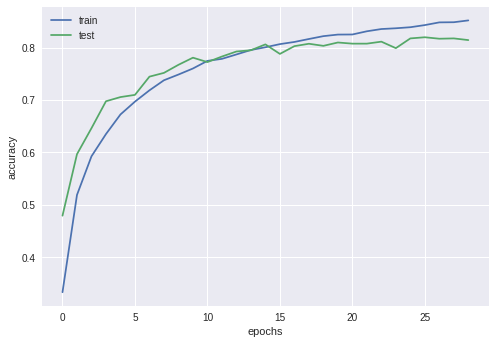

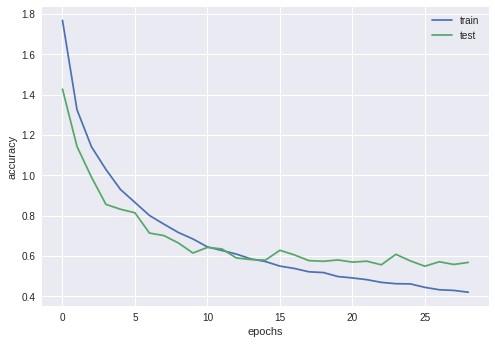

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc)
plt.plot(val_acc)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

plt.plot(loss)
plt.plot(val_loss)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()
